In [4]:
#order blast by sseqid start
import pandas as pd
blast_file = 'extras/data/iwgsc_cn4/blast_90_90.csv'
blast_file_orderer = 'extras/data/iwgsc_cn4/blast_90_90.order.csv'
df_blast = pd.read_csv(blast_file, index_col=False, sep='\t')
df_blast.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
df_blast = df_blast.sort_values(['sseqid', 'sstart'])
df_blast.to_csv(blast_file_orderer, sep="\t", index=None)
df_blast.head()


,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
3387,MITE_T_9379|chr5A|253680838|253681189|GC|364|F534,chr1A,90.56,339.0,30.0,1.0,12.0,348.0,213865.0,214203.0,2.000000e-129,464.0
5079,MITE_T_11550|chr4B|491446578|491446917|ATTC|34...,chr1A,94.86,331.0,17.0,0.0,7.0,337.0,213868.0,214198.0,3.000000e-146,520.0
6222,MITE_T_13916|chr3D|469844247|469844577|GATA|34...,chr1A,93.52,324.0,20.0,1.0,3.0,325.0,213868.0,214191.0,7.000000e-136,486.0
6028,MITE_T_13765|chr7B|255748631|255748962|TTTT|33...,chr1A,91.08,325.0,29.0,0.0,4.0,328.0,214192.0,213868.0,1.000000e-126,455.0
6901,MITE_T_16464|chr6B|25945785|25946111|AA|329|F696,chr1A,93.56,326.0,21.0,0.0,1.0,326.0,214193.0,213868.0,5.000000e-138,493.0


In [5]:
#order blast by sseqid start
import pandas as pd
blast_file = 'extras/data/iwgsc_cn4/blast_95.csv'
blast_file_orderer = 'extras/data/iwgsc_cn4/blast_95_95.order.csv'
df_blast = pd.read_csv(blast_file, index_col=False, sep='\t')
df_blast.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
df_blast = df_blast.sort_values(['sseqid', 'sstart'])
df_blast.to_csv(blast_file_orderer, sep="\t", index=None)
df_blast.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
820,MITE_T_11550|chr4B|491446578|491446917|ATTC|34...,chr1A,95.17,331,16,0,7,337,442471,442801,8.000000e-148,526.0
2934,MITE_T_45970|chr3B|651188527|651188767|AT|42|F...,chr1A,97.08,240,6,1,1,240,674129,674367,2.000000e-109,398.0
2963,MITE_T_45970|chr3B|651188527|651188767|AT|42|F...,chr1A,96.67,240,7,1,1,240,676678,676916,2.000000e-108,394.0
2988,MITE_T_45970|chr3B|651188527|651188767|AT|42|F...,chr1A,96.25,240,8,1,1,240,679227,679465,1.000000e-106,389.0
14809,MITE_T_100638|chr4A|274958954|274959060|ACT|25...,chr1A,95.28,106,5,0,1,106,712631,712526,6.000000e-41,168.0


Most common MITEs in wheat / TREP

In [1]:
#

Distance from MITEs to genes

In [ ]:
gene_file = '../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3'
blat_file = 'extras/data/iwgsc_cn4/blat_95_95_new.csv'
blast_file = 'extras/data/iwgsc_cn4/blast_95.csv'
genome_file = 'extras/data/iwgsc.gff3'

#for rice data
#genome_file = 'extras/data/rice.gff3.csv'
#blat_file = 'extras/data/tracker/blat_90_90.csv'
#gene_file = '../data/IRGSP-1.0_representative/locus.gff'

In [3]:
#load MITEs
import pandas as pd
import sys
df_blat = pd.read_csv(blat_file, index_col=False, sep='\t')
df_blat = df_blat[df_blat.tName != 'chrUn'].reset_index(drop=True)

In [5]:
#load MITEs in blast
import pandas as pd
import sys
df_blat = pd.read_csv(blast_file, index_col=False, sep='\t')
df_blat.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
df_blat = df_blat[df_blat.sseqid != 'chrUn'].reset_index(drop=True)

In [ ]:
#load genes
df_genes = pd.read_csv(gene_file, index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

In [8]:
#load genome structure
df_genome = pd.read_csv(genome_file, index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes_genome = {}
for k,chromosome in df_genome.iterrows():
    df_genes_genome[chromosome.seqname] = df_genes[(df_genes.seqname == chromosome.seqname)].reset_index()

In [10]:
#calculate distance to closest gene
distances = []
print(len(df_blat.index))
for k,v in df_blat.iterrows():
    midd = (v.sstart + v.send) / 2
    df_curr = df_genes_genome[v.sseqid]
    df_res = df_curr.loc[(df_curr.start - midd).abs().argsort()[:1]]
    if len(df_res.index) > 0:
        closest = (int(df_res.start) + int(df_res.end)) / 2
        distance = abs(midd - closest)
        distances.append(distance)
    else:
        print(v.qseqid, midd)
        print(df_res)
        print(df_curr)
        print('error')

682396


In [11]:
#calculate distance max and min
print(min(distances))
print(max(distances))
distances_kb = []
for d in distances:
    distances_kb.append(d/1000)

0.0
3631676.5


In [16]:
#! pip3 install seaborn
distances_kb_filtered = []
for distance_kb in distances_kb:
    if distance_kb <= 500:
        distances_kb_filtered.append(distance_kb)

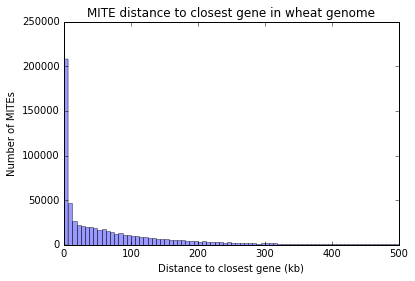

In [17]:
%matplotlib inline

# PLOT
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn histogram
sns.distplot(distances_kb_filtered, hist=True, kde=False, 
             bins=80, color = 'blue',
             hist_kws={'edgecolor':'black'},rug=False)
# Add labels
plt.title('MITE distance to closest gene in wheat genome')
plt.xlabel('Distance to closest gene (kb)')
plt.ylabel('Number of MITEs')
plt.savefig('extras/histogram.png', dpi=800,bbox_inches='tight')




Count Families

In [17]:
#count families 
import pandas as pd
import sys
df_blat = pd.read_csv('extras/data/iwgsc_cn4/blat_ts17_95_95.csv', index_col=False, sep='\t')
df_blat.columns = ['match','mismatch','repmatch','ns','qGapCount','qGapBases','tGapCount','tGapBases','strand','qName','qSize','qStart','qEnd','tName','tSize','tStart','tEnd','blockCount','blockSizes','qStarts','tStarts','cov','sa']

In [14]:
s = df_blat.qseqid.value_counts()

In [15]:
count = 1
for k in s.head(100).index.tolist():
#    df_blat[df_blat.qName == k].sort_values(by=['tName','tStart']).to_csv(str(count) + '.csv')
    count += 1
    print(s[k],k)

    

8027 MITE_T_90576|chr3D|581983465|581983588|TA|35|F3909
4343 MITE_T_45970|chr3B|651188527|651188767|AT|42|F1918
3927 MITE_T_119843|chr2B|409855987|409856068|TA|85|F5463
3897 MITE_T_84430|chr3D|531147691|531147821|TA|43|F3641
3879 MITE_T_76234|chr1D|360358225|360358385|TA|169|F3188
3678 MITE_T_67707|chr4B|488893119|488893288|TT|176|F2742
3627 MITE_T_113077|chr4B|190259909|190259996|TA|91|F5145
3547 MITE_T_118365|chr5A|113012180|113012261|TA|85|F5422
3546 MITE_T_112462|chr2D|335449673|335449760|TA|91|F5136
3505 MITE_T_114717|chr1D|98479831|98479916|AG|85|F5233
3494 MITE_T_116731|chr3D|27621554|27621637|AT|87|F5322
3418 MITE_T_119032|chr5B|127018445|127018526|TA|85|F5434
3048 MITE_T_74129|chr6B|320412940|320413102|TA|173|F3036
3035 MITE_T_74920|chr3A|585605639|585605800|TA|173|F3090
3001 MITE_T_88612|chr4B|499756008|499756133|AGT|132|F3813
2996 MITE_T_74720|chr5A|206730853|206731014|TA|173|F3077
2869 MITE_T_113343|chr2B|179285004|179285091|GA|87|F5153
2855 MITE_T_114079|chr2A|11304740|113

In [11]:
#count genes with MITEs in full genome
import pandas as pd

genome_file = 'extras/data/iwgsc.gff3'
df_genome = pd.read_csv(genome_file, index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']


df_blat = pd.read_csv('extras/data/iwgsc_cn4/blast_95.csv', index_col=False, sep='\t')
df_blat.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

df_genes = pd.read_csv('../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

blat_genome = {}
for k,chromosome in df_genome.iterrows():
    blat_genome[chromosome.seqname] = df_blat[(df_blat.sseqid == chromosome.seqname)]
blat_genome[chromosome.seqname] = df_blat[(df_blat.sseqid == chromosome.seqname)]

gene_with_mites_count = 0
gene_count = len(df_genes.index)
gene_names = []
for k2,gene in df_genes.iterrows():
    curr_df = blat_genome[gene.seqname]
    res_1 = curr_df[(curr_df.sstart >= gene.start) & (curr_df.sstart <= gene.end)]
    res_2 = curr_df[(curr_df.send >= gene.start) & (curr_df.send <= gene.end)]
    if len(res_1.index) > 0 or len(res_2.index) > 0:
        gene_names.append(gene.attribute)
        gene_with_mites_count += 1

gene_names = set(gene_names)
thefile = open('extras/genes_with_mites.txt', 'w')
for item in gene_names:
    thefile.write("%s\n" % item)

print('Total genes', gene_count)
print('Genes with MITEs', gene_with_mites_count)
print('That"s',  gene_with_mites_count * 100 / gene_count)

Total genes 110789
Genes with MITEs 7767
That"s 7.010623798391537


In [23]:
df_blat.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,MITE_T_100|chr4B|149720156|149720951|AT|279|F15,chr1A,98.36,795,13,0,1,795,562130598,562129804,0.0,1375.0
1,MITE_T_316|chr1A|335048447|335048919|CT|15|F33,chr1A,100.00,472,0,0,1,472,335048448,335048919,0.0,852.0
2,MITE_T_332|chr1A|557861785|557862256|TAA|21|F35,chr1A,100.00,471,0,0,1,471,557861786,557862256,0.0,850.0
3,MITE_T_417|chr3A|333269323|333269791|TAGCCCAAG...,chr1A,96.58,468,6,2,1,468,259994055,259993598,0.0,773.0
4,MITE_T_547|chr7A|173865867|173866329|TATATATAT...,chr1A,95.89,438,17,1,26,462,100100967,100101404,0.0,706.0


In [ ]:
#count genes with MITEs per chromosome
import pandas as pd

df_blat = pd.read_csv('data/iwgsc_cn4/blat_95_95.csv', index_col=False, sep='\t')

df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

df_genome = pd.read_csv('data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']

blat_genome = {}
for k1,genome in df_genome.iterrows():
    curr_blat = df_blat[(df_blat.tName == genome.seqname)] 
    curr_genes = df_genes[(df_genes.seqname == genome.seqname)]
    gene_with_mites_count = 0
    gene_count = len(curr_genes.index)
    print(gene_count)
    for k2,gene in curr_genes.iterrows():
        res_1 = curr_blat[(curr_blat.tStart >= gene.start) & (curr_blat.tStart <= gene.end)]
        res_2 = curr_blat[(curr_blat.tEnd >= gene.start) & (curr_blat.tEnd <= gene.end)]
        if len(res_1.index) > 0 or len(res_2.index) > 0:
            gene_with_mites_count += 1
    print(genome.seqname,gene_with_mites_count)
    print(genome.seqname,gene_with_mites_count * 100 / gene_count)

In [ ]:
#count genes with MITEs per genome
import pandas as pd

df_blat = pd.read_csv('data/iwgsc_cn4/blat_95_95.csv', index_col=False, sep='\t')

df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

df_genome = pd.read_csv('data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
print('starting...')
blat_genome = {}
for k,chromosome in df_genome.iterrows():
    blat_genome[chromosome.seqname] = df_blat[(df_blat.tName == chromosome.seqname)]
print('proccessing genomes...')
for genome in ['A','B','D']:
    curr_genes = df_genes[(df_genes.seqname.str.contains(genome))]
    gene_with_mites_count = 0
    gene_count = len(curr_genes.index)
    print(gene_count)
    for k2,gene in curr_genes.iterrows():
        curr_df = blat_genome[gene.seqname]
        res_1 = curr_df[(curr_df.tStart >= gene.start) & (curr_df.tStart <= gene.end)]
        res_2 = curr_df[(curr_df.tEnd >= gene.start) &  (curr_df.tEnd <= gene.end)]
        if len(res_1.index) > 0 or len(res_2.index) > 0:
            if k2 % 1000 == 0:
                print(k2,gene_with_mites_count)
            gene_with_mites_count += 1
    print(genome,gene_with_mites_count)
    print(genome,gene_with_mites_count * 100 / gene_count)

In [22]:
#percentage of genome covered by MITEs
import pandas as pd

def merge_overlap(intervals):
    sorted_by_lower_bound = sorted(intervals, key=lambda tup: tup[0])
    merged = []
    for higher in sorted_by_lower_bound:
        if not merged:
            merged.append(higher)
        else:
            lower = merged[-1]
            # test for intersection between lower and higher:
            # we know via sorting that lower[0] <= higher[0]
            if higher[0] <= lower[1]:
                upper_bound = max(lower[1], higher[1])
                merged[-1] = (lower[0], upper_bound)  # replace by merged interval
            else:
                merged.append(higher)
    return merged

df_blat = pd.read_csv('extras/data/iwgsc_cn4/blast_95.csv', index_col=False, sep='\t')

df_genome = pd.read_csv('extras/data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
intervals = {}
for k,v in df_blat.iterrows():
    genome = v.sseqid
    if not genome in intervals:
        intervals[genome] = []
    intervals[genome].append((v.sstart,v.send))
    
print("a")
percs_genome = {}
total_sum = 0
for k,v in df_genome.iterrows():
    genome = v.seqname[4:6]
    if not genome in percs_genome:
        percs_genome[genome] = 0
    current_interval = merge_overlap(intervals[v.seqname])
    interval_sum = 0
    for i in current_interval:
        interval_sum += max(i) - min(i)
    perc = interval_sum * 100 / v.end
    print(v.seqname, perc)
    #calculate avg for full genomes
    percs_genome[genome] += perc
    total_sum += perc
    
for genome in ['A','B','D']:
    print(genome, percs_genome[genome] / 7)
print('Total', total_sum / 21)

a
chr1A 0.15468318796728756
chr1B 0.19118104296796354
chr1D 0.1730583280576583
chr2A 0.1511612680913292
chr2B 0.20055644713068022
chr2D 0.17805129318735302
chr3A 0.151991964867668
chr3B 0.192896315158974
chr3D 0.16570757613604584
chr4A 0.13973442771263417
chr4B 0.17963250684495652
chr4D 0.15141361176817816
chr5A 0.14981492489501685
chr5B 0.20531409926568903
chr5D 0.16475955422869876
chr6A 0.13810219097142978
chr6B 0.18103493187862013
chr6D 0.15735714922880212
chr7A 0.148713143239906
chr7B 0.203842052597599
chr7D 0.16337760811139052
A 0.14774301539218165
B 0.19349391369206895
D 0.1648178743883038
Total 0.16868493449085142


In [ ]:
#count genes per genome
import pandas as pd
df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene']
total_genes = len(df_genes.index)
print('total genes', total_genes)
s = df_genes.seqname.value_counts()
genome = {}
for k in s.index.tolist():
    gen = k[4:6]
    if not gen in genome:
        genome[gen] = s[k]
    else:
        genome[gen] += s[k]
print(genome)

In [ ]:
#calculate MITE and gene density
import pandas as pd
import sys
df_blast = pd.read_csv('data/iwgsc_cn4/blat_95_95.csv', index_col=False, sep='\t')
df_genome = pd.read_csv('data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
total_bp = 0
for k,v in df_genome.iterrows():
    total_bp += v.end

total_mites = len(df_blast.index)
total_mb = total_bp / 1000 / 1000
total_mb_total = total_mb
total_gb = total_mb / 1000 
print ('Total:','&',int(total_mb),'&',total_mites,'&',int(total_mites / total_mb))

genome_sizes = {}
for k,v in df_genome.iterrows():
    df_blast_seq = df_blast[df_blast.tName == v.seqname]
    total_mites = len(df_blast_seq.index)
    total_mb = v.end / 1000 / 1000
    seq = v.seqname.replace('chr','')
    if not seq[1:2] in genome_sizes:
        genome_sizes[seq[1:2]] = total_mb
    else:
        genome_sizes[seq[1:2]] += total_mb
    print (seq,'&',int(total_mb),'&',total_mites,'&',int(total_mites / total_mb))

for genome in ['A','B','D']:
    df_blast_seq = df_blast[df_blast.tName.str.contains(genome)]
    total_mites = len(df_blast_seq.index)
    print (genome,'&', int(genome_sizes[genome]),'&',total_mites,'&',int(total_mites / genome_sizes[genome]))
print('*' * 10)
    
    
df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene']
total_genes = len(df_genes.index)
print ('Total Genes:',total_genes)
print ('Total Genes per MB:',total_genes / total_mb_total)